$$\dot x=-x+$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchdiffeq import odeint

In [ ]:
class TwoLayerNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TwoLayerNN, self).__init__()
        self.hidden_dim = hidden_dim
        
        # Initialize the first layer weights and biases
        thetas = torch.linspace(0, 2 * np.pi, hidden_dim)
        init_weights = torch.stack((torch.cos(thetas), torch.sin(thetas)), dim=1)  # Corrected shape
        self.fc1 = nn.Linear(input_dim, hidden_dim, bias=True)
        self.fc1.weight = nn.Parameter(init_weights)
        self.fc1.bias = nn.Parameter(torch.zeros(hidden_dim))
        
        # Initialize the second layer
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [121]:
class SymmetricNetwork(nn.Module):
    def __init__(self, hidden_dim, b_scalar, gain_scalar=1.0, angle_dist="regular"):
        super(SymmetricNetwork, self).__init__()
        if angle_dist == "regular":
            thetas = torch.linspace(0, 2 * np.pi, hidden_dim)
        elif angle_dist == "random_uniform":
            thetas = torch.rand(hidden_dim) * 2 * np.pi
        else:
            raise ValueError("angle_dist must be 'regular' or 'uniform'")
        weights1 = torch.stack((torch.cos(thetas), torch.sin(thetas)), dim=1)
        bias1 = torch.ones(hidden_dim) * b_scalar
        weights2 = torch.stack((torch.cos(thetas), torch.sin(thetas)), dim=1).T * 2 / hidden_dim * gain_scalar
        self.fc1 = nn.Linear(2, hidden_dim, bias=True)
        self.fc1.weight = nn.Parameter(weights1)
        self.fc1.bias = nn.Parameter(bias1)
        self.fc2 = nn.Linear(hidden_dim, 2)
        self.fc2.weight = nn.Parameter(weights2)
        
    def forward(self, x):
        x = F.linear(x, self.fc1.weight, self.fc1.bias)
        x = F.relu(x)
        x = F.linear(x, self.fc2.weight)
        return x

    def forward_with_output(self, x):
        x = F.linear(x, self.fc1.weight, self.fc1.bias)
        x = F.relu(x)
        h1 = x
        x = F.linear(x, self.fc2.weight)
        return x, h1



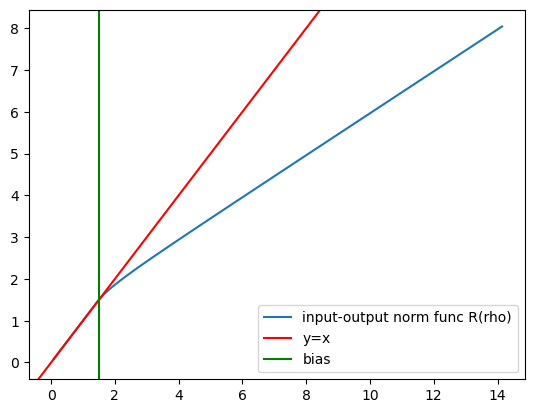

In [133]:

hidden_dim = 500
b_scalar = 1.5
gain = 1.0
model = SymmetricNetwork(hidden_dim, b_scalar, gain_scalar=gain)
unit_vec = torch.tensor([[1.0, -1.0]])
unit_vecs = torch.linspace(0.05, 10, 100).view(-1, 1) * unit_vec
vec_out = model(unit_vecs)
plt.plot(unit_vecs.norm(dim=1).detach().numpy(), vec_out.norm(dim=1).detach().numpy(), 
         label="input-output norm func R(rho)")
# diagonal line
# plt.plot(unit_vecs[:, 0].detach().numpy(), vec_out[:, 0].detach().numpy())
# plt.plot(unit_vecs[:, 0].detach().numpy(), vec_out[:, 1].detach().numpy())
plt.axline((0, 0), slope=1, color='r', label='y=x')
plt.axvline(x=b_scalar, color='g', label='bias')
plt.legend()
plt.show()

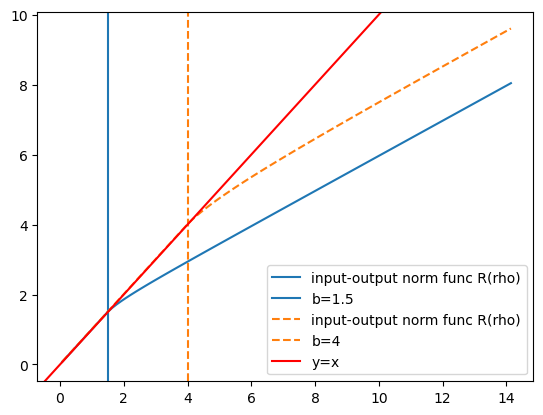

In [137]:

from matplotlib import lines


hidden_dim = 500
b_scalar = 1.5
gain = 1.0
model = SymmetricNetwork(hidden_dim, b_scalar, gain_scalar=gain)
unit_vec = torch.tensor([[1.0, -1.0]])
unit_vecs = torch.linspace(0.05, 10, 100).view(-1, 1) * unit_vec
vec_out = model(unit_vecs)
plt.plot(unit_vecs.norm(dim=1).detach().numpy(), vec_out.norm(dim=1).detach().numpy(), 
         label="input-output norm func R(rho)", color="C0")
plt.axvline(x=b_scalar, color="C0", label=f'b={b_scalar}')

b_scalar = 4
gain = 1.0
model = SymmetricNetwork(hidden_dim, b_scalar, gain_scalar=gain)
unit_vec = torch.tensor([[1.0, -1.0]])
unit_vecs = torch.linspace(0.05, 10, 100).view(-1, 1) * unit_vec
vec_out = model(unit_vecs)
plt.plot(unit_vecs.norm(dim=1).detach().numpy(), vec_out.norm(dim=1).detach().numpy(), 
         label="input-output norm func R(rho)", linestyle='dashed', color="C1")
plt.axvline(x=b_scalar, color="C1", label=f'b={b_scalar}', linestyle='dashed')
# diagonal line
# plt.plot(unit_vecs[:, 0].detach().numpy(), vec_out[:, 0].detach().numpy())
# plt.plot(unit_vecs[:, 0].detach().numpy(), vec_out[:, 1].detach().numpy())
plt.axline((0, 0), slope=1, color='r', label='y=x')
plt.legend()
plt.show()

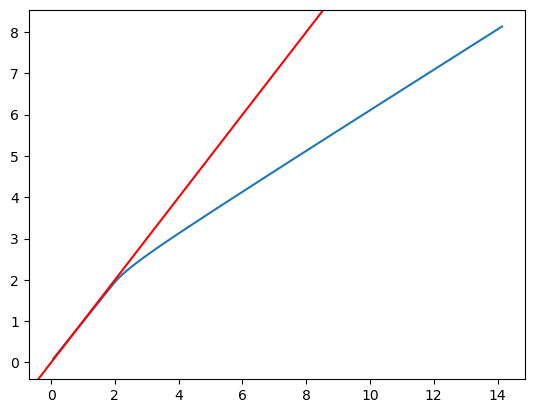

In [126]:
hidden_dim = 500
b_scalar = 2.0
gain = 1.0
angle_dist = "random_uniform"
model = SymmetricNetwork(hidden_dim, b_scalar, gain_scalar=gain, angle_dist=angle_dist)
unit_vec = torch.tensor([[1.0, -1.0]])
unit_vecs = torch.linspace(0.05, 10, 100).view(-1, 1) * unit_vec
vec_out = model(unit_vecs)
# plt.plot(unit_vecs[:, 0].detach().numpy(), vec_out[:, 0].detach().numpy())
# plt.plot(unit_vecs[:, 0].detach().numpy(), vec_out[:, 1].detach().numpy())
plt.plot(unit_vecs.norm(dim=1).detach().numpy(), vec_out.norm(dim=1).detach().numpy())
# diagonal line
plt.axline((0, 0), slope=1, color='r')
plt.show()